In [40]:
# https://www.kaggle.com/code/emineyetm/multiple-linear-regression-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
df = pd.read_csv("data.csv")
df.head()


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [43]:
print(df.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


In [44]:
df.select_dtypes(include='number').corr()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


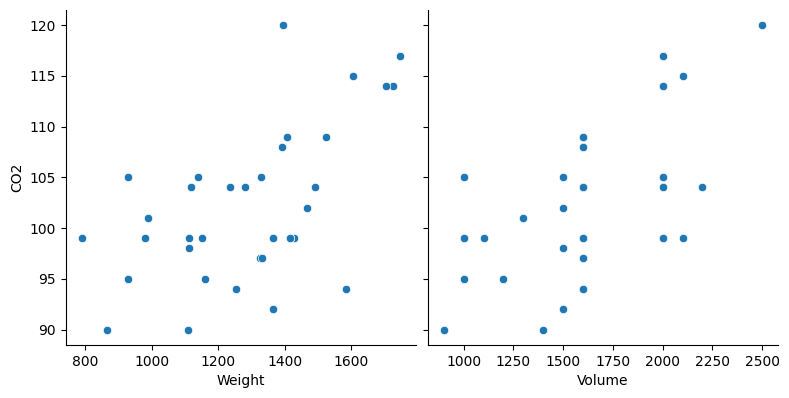

In [45]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

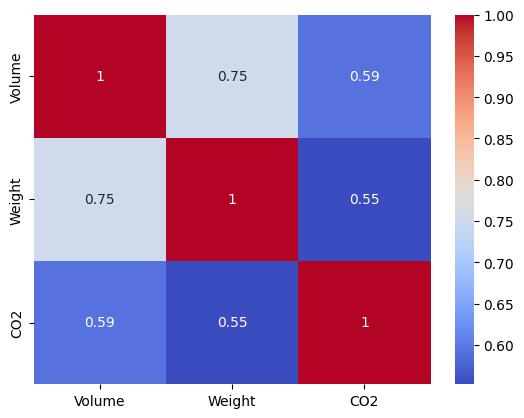

In [46]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [47]:
# variáveis dependentes e independentes
X = df[['Weight', 'Volume']]
y = df['CO2']

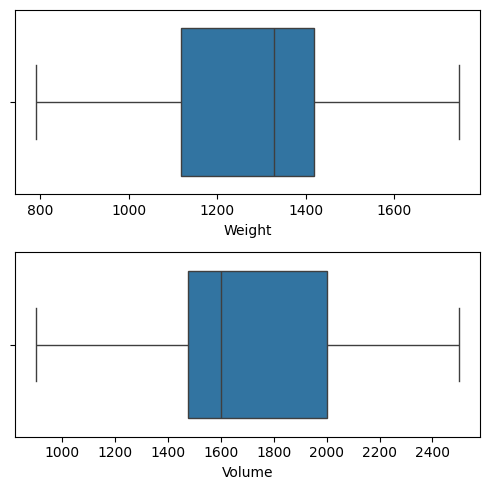

In [48]:
# outliers
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(x=df['Weight'], ax = axs[0])
plt2 = sns.boxplot(x=df['Volume'], ax = axs[1])
plt.tight_layout()

<Axes: xlabel='CO2', ylabel='Count'>

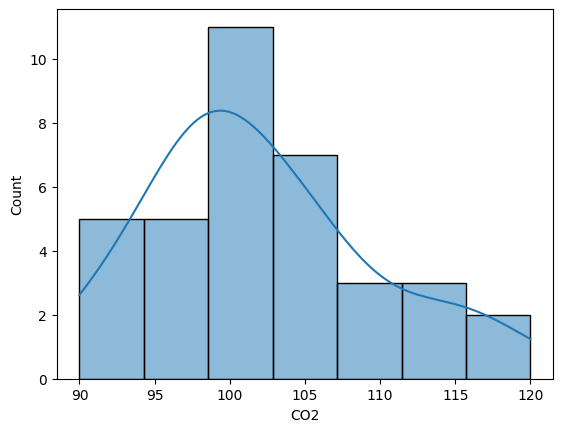

In [49]:
# Distribuição Normal
sns.histplot(df['CO2'], kde=True)

In [50]:
# Modelo
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [51]:
y_train.shape

(25,)

In [52]:
y_test.shape

(11,)

In [53]:
reg_model = linear_model.LinearRegression()

In [54]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [55]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)

# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  74.33882836589245


[('Weight', np.float64(0.0171800645996374)),
 ('Volume', np.float64(0.0025046399866402976))]

Intercept:  74.33882836589245

In [56]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [57]:
print("Prediction for test set: {}".format(y_pred))


Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [58]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [59]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636316
Mean Square Error: 63.39765310998794
Root Mean Square Error: 7.96226432053018
